In [221]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../../data/Airbnb_London/listings.csv'

In [223]:
df = pd.read_csv(path)
df = pd.DataFrame(df)

In [224]:
dat = df.copy()

<h3>필요한 컬럼 가져오기(24개) + property_type <h3>

In [225]:
#필요한 컬럼 가져오기
selected_columns = ['id','listing_url','host_id', 'property_type', 'number_of_reviews_ltm',
                    'host_is_superhost','host_total_listings_count','neighbourhood_cleansed','latitude',
                    'longitude','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price',
                    'minimum_nights','maximum_nights','number_of_reviews','number_of_reviews_l30d',
                    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location',
                    'review_scores_value','reviews_per_month']
df = df[selected_columns]

df.head(3)

,id,listing_url,host_id,property_type,number_of_reviews_ltm,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,...,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,1608226,Entire rental unit,26,t,3.0,Hackney,51.52704,-0.08129,...,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,13913,https://www.airbnb.com/rooms/13913,54730,Private room in rental unit,1,t,5.0,Islington,51.56861,-0.11270,...,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,15400,https://www.airbnb.com/rooms/15400,60302,Entire rental unit,2,f,1.0,Kensington and Chelsea,51.48780,-0.16813,...,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


<h3>필요한 컬럼명 변경</h3><br>


컬렴명 변경

- 'id' : '숙소 id'
- 'property_type' : '숙소_특징'
- 'listing_url' : '숙소 url'
- 'host_id' : '호스트 id'
- 'host_is_superhost' : '슈퍼호스트 여부'
- 'latitude' : '위도'
- 'longitude' : '경도'
- 'host_total_listings_count' : '등록한 총 숙소 수'
- 'neighbourhood_cleansed' : '클린된 숙소 구'
- 'room_type' : '룸 유형'
- 'accommodates' : '수용 인원수'
- 'bathrooms' : '욕실수'
- 'bedrooms' : '침실수'
- 'beds' : '침대수'
- 'amenities' : '어메니티'
- 'price' : '숙소 가격'
- 'minimum_nights' : '최소 숙박일'
- 'maximum_nights' : '최대 숙박일'
- 'number_of_reviews' : '총 리뷰수'
- 'number_of_reviews_l30d' : '한달치 리뷰수'
- 'review_scores_rating' : '리뷰 총점수'
- 'review_scores_accuracy' : '리뷰점수(숙소정보 정확성 )'
- 'review_scores_cleanliness' : '리뷰점수(청결함)'
- 'review_scores_checkin' : '리뷰점수(체크인과정)'
- 'review_scores_communication' : '리뷰점수(호스트와 소통)'
- 'review_scores_location' : '리뷰점수(숙소위치)'
- 'review_scores_value' : '리뷰점수(숙소가격)'
- 'reviews_per_month' : '월별 평균 리뷰수'

In [226]:
#컬럼명 변경
df = df.rename(columns={
    'id' : '숙소_id',
    'listing_url' : '숙소_url',
    'property_type' : '숙소_특징',
    'host_id' : '호스트_id',
    'host_is_superhost' : '슈퍼호스트',
    'host_total_listings_count' : '숙소_수',
    'neighbourhood_cleansed' : '숙소_지역',
    'latitude' : '위도',
    'longitude' : '경도',
    'room_type' : '숙소_유형',
    'accommodates' : '수용인원수',
    'bathrooms' : '욕실수',
    'bedrooms' : '침실수',
    'beds' : '침대수',
    'amenities' : '어메니티',
    'price' : '숙소_가격',
    'minimum_nights' : '최소_숙박일',
    'maximum_nights' : '최대_숙박일',
    'minimum_maximum_nights' : '적은_최대_숙박일',
    'maximum_maximum_nights' : '많은_최대_숙박일',
    'has_availability' : '숙소_예약가능_여부',
    'number_of_reviews' : '리뷰수',
    'number_of_reviews_l30d' : '30일_리뷰수',
    'review_scores_rating' : '리뷰점수',
    'review_scores_accuracy' : '숙소_정확성_리뷰점수',
    'review_scores_cleanliness' : '숙소_청결도_리뷰점수',
    'review_scores_checkin' : '숙소_체크인_리뷰점수',
    'review_scores_communication' : '숙소_소통_리뷰점수',
    'review_scores_location' : '숙소_위치_리뷰점수',
    'review_scores_value' : '숙소_가격_리뷰점수',
    'reviews_per_month' : '평균_리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수'
})

<h3>주제별 컬럼 분류<h3><br>

숙소/숙박 컬럼 (25개) df_lodging - 리뷰 컬럼(10개) df_review

In [227]:
#숙소/숙박관련 컬럼

df_lodging = dat[['id', 'listing_url','host_id','host_is_superhost','property_type',
                  'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
                  'beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,listing_url,host_id,host_is_superhost,property_type,host_total_listings_count,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,Entire rental unit,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,t,Private room in rental unit,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,f,Entire rental unit,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [228]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'property_type' : '숙소_특징',
    'listing_url' : '숙소_url',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)

,숙소_id,숙소_url,호스트_id,슈퍼호스트,숙소_특징,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,312761,https://www.airbnb.com/rooms/312761,1608226,t,Entire rental unit,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,https://www.airbnb.com/rooms/13913,54730,t,Private room in rental unit,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,https://www.airbnb.com/rooms/15400,60302,f,Entire rental unit,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [229]:
#리뷰관련데이터
df_review = dat[['listing_url','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                'review_scores_location', 'review_scores_value', 'reviews_per_month','number_of_reviews_ltm']]
df_review.head(3)

,listing_url,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,number_of_reviews_ltm
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,26
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,1
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,2


In [230]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'listing_url' : '숙소_url',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수'
})
df_review.head()

,숙소_url,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
0,https://www.airbnb.com/rooms/312761,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86,26
1,https://www.airbnb.com/rooms/13913,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25,1
2,https://www.airbnb.com/rooms/15400,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54,2
3,https://www.airbnb.com/rooms/159736,96,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62,1
4,https://www.airbnb.com/rooms/165336,237,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57,25


In [231]:
df_lodging.shape

(90852, 16)

In [232]:
df_review.shape


(90852, 12)

In [233]:
df.shape

(90852, 29)

In [234]:
df.dtypes


숙소_id            int64
숙소_url          object
호스트_id           int64
숙소_특징           object
12개월_리뷰수         int64
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
위도             float64
경도             float64
숙소_유형           object
수용인원수            int64
욕실수            float64
침실수            float64
침대수            float64
어메니티            object
숙소_가격           object
최소_숙박일           int64
최대_숙박일           int64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
dtype: object

In [235]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   숙소_특징        90852 non-null  object 
 4   12개월_리뷰수     90852 non-null  int64  
 5   슈퍼호스트        90463 non-null  object 
 6   숙소_수         90847 non-null  float64
 7   숙소_지역        90852 non-null  object 
 8   위도           90852 non-null  float64
 9   경도           90852 non-null  float64
 10  숙소_유형        90852 non-null  object 
 11  수용인원수        90852 non-null  int64  
 12  욕실수          57894 non-null  float64
 13  침실수          78118 non-null  float64
 14  침대수          57837 non-null  float64
 15  어메니티         90852 non-null  object 
 16  숙소_가격        57885 non-null  object 
 17  최소_숙박일       90852 non-null  int64  
 18  최대_숙박일       90852 non-null  int64  
 19  리뷰수 

<h3>결측치 개수</h3><br>

- 슈퍼호스트 389개
- 문의_응답률 33,055개
- 숙소_수 5개
- 욕실수 32,958개
- 침실수 12,734개
- 침대수 33,015개
- 숙소_가격 32,967개
- 리뷰점수 24,983개
- 숙소_정확성_리뷰점수 25014개
- 숙소_청결도_리뷰점수 25009개
- 숙소_체크인_리뷰점수 25044개
- 숙소_소통_리뷰점수 25019개
- 숙소_위치_리뷰점수 25044개
- 숙소_가격_리뷰점수 25046개
- 평균_리뷰수 24983개

- -----------------------------------------

- 숙소_상세설명 3,001개
- 프로필사진_소지_여부 5개
- 신원_검증_여부 5개
- 숙소_예약가능_여부 4079개

결측치 제거 확정 <br>
- 슈퍼호스트 null값 (389개) 5%이하
- 리뷰수 = 0인 값 --> 리뷰수가 없으면 리뷰점수도 없다
- 숙소수 null값 (5개)
- 리뷰분야 6개 전부 nan값인 컬럼
- 리뷰수 = 1 인값 

<h3>슈퍼호스트 결측치 처리</h3>

- 슈퍼호스트가 null값인 데이터 삭제 389개임(5%이하 해당)



In [236]:
df['슈퍼호스트'].isna().sum()


389

In [237]:
df = df.dropna(subset=['슈퍼호스트'])
df.shape

(90463, 29)

<h3>숙소수 결측치 처리</h3>

- 숙소수가 null값인 데이터 삭제 5개임(5%이하 해당)

In [238]:
df = df.dropna(subset=['숙소_수'])

df.shape

(90458, 29)

<h3>리뷰수 결측치 처리</h3>

In [239]:
df[df['리뷰수'] == 0]


,숙소_id,숙소_url,호스트_id,숙소_특징,12개월_리뷰수,슈퍼호스트,숙소_수,숙소_지역,위도,경도,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
9,170524,https://www.airbnb.com/rooms/170524,194769,Entire rental unit,0,f,9.0,Westminster,51.506120,-0.140290,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,318986,https://www.airbnb.com/rooms/318986,1637212,Entire rental unit,0,f,1.0,Kensington and Chelsea,51.491130,-0.194820,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,42692,https://www.airbnb.com/rooms/42692,186510,Private room in rental unit,0,f,1.0,Hammersmith and Fulham,51.508220,-0.215620,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,44384,https://www.airbnb.com/rooms/44384,194769,Private room in rental unit,0,f,9.0,Barnet,51.597900,-0.243270,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,324055,https://www.airbnb.com/rooms/324055,1664001,Private room in home,0,f,1.0,Newham,51.553110,0.022730,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90847,1115272743905612628,https://www.airbnb.com/rooms/1115272743905612628,565833376,Entire rental unit,0,f,55.0,Bexley,51.502721,0.147342,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90848,1115272767893608505,https://www.airbnb.com/rooms/1115272767893608505,565833376,Entire rental unit,0,f,55.0,Bexley,51.504134,0.148848,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90849,1115285644506865913,https://www.airbnb.com/rooms/1115285644506865913,444801189,Room in hotel,0,f,44.0,Westminster,51.506404,-0.148199,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90850,1115338006572763275,https://www.airbnb.com/rooms/1115338006572763275,514234035,Entire rental unit,0,f,62.0,Westminster,51.513649,-0.161906,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
df = df[(df['리뷰수'] != 0)]


In [241]:
df.shape


(65538, 29)

<h3>리뷰분야 (6개)결측치 처리</h3>
'숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수'

In [242]:
review_field = df['숙소_정확성_리뷰점수'].isna() & df['숙소_청결도_리뷰점수'].isna() & df['숙소_체크인_리뷰점수'].isna() & df['숙소_소통_리뷰점수'].isna() \
   & df['숙소_위치_리뷰점수'].isna() &df['숙소_가격_리뷰점수'].isna()

In [243]:
df = df[~review_field]

In [244]:
df.shape

(65516, 29)

In [245]:
#각 분야의 널값
df['숙소_정확성_리뷰점수'].isna().sum() # 9개
df['숙소_청결도_리뷰점수'].isna().sum() # 4개
df['숙소_소통_리뷰점수'].isna().sum() # 14개
df['숙소_위치_리뷰점수'].isna().sum() # 39개
df['숙소_가격_리뷰점수'].isna().sum() # 41개

41

숙소유형이 Hotel room / Shared room 인 행 삭제

- 에어비앤비 숙소의 특징인 개인실 대여, 아파트 집 대여인 점을 이용

In [246]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    42526
Private room       22621
Shared room          220
Hotel room           149
Name: count, dtype: int64

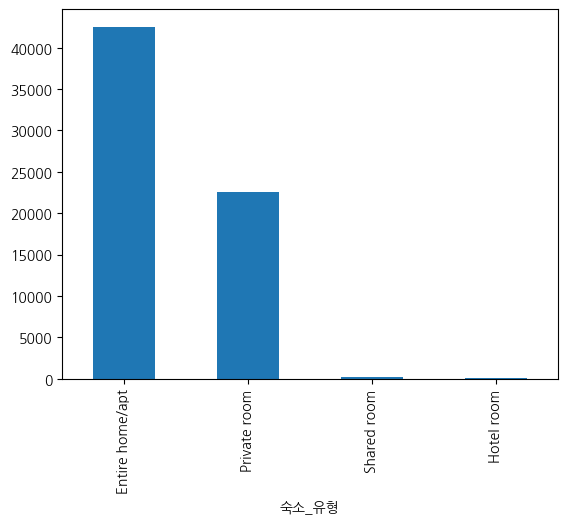

In [247]:
df['숙소_유형'].value_counts().plot(kind='bar')
plt.show()

In [248]:
condition = (df['숙소_유형'] == 'Hotel room') | (df['숙소_유형'] == 'Shared room')

In [249]:
df = df[~condition]

In [250]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    42526
Private room       22621
Name: count, dtype: int64

숙소가격 결측치 처리

In [251]:
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace('$', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.replace(',', "")
df.loc[:,'숙소_가격'] = df['숙소_가격'].str.strip()

In [252]:
df['숙소_가격'] = df.loc[:,'숙소_가격'].astype(float)
df['숙소_가격']


0        160.0
1         65.0
2        120.0
3         65.0
4        100.0
         ...  
90451     46.0
90568     78.0
90590    136.0
90648    109.0
90735     41.0
Name: 숙소_가격, Length: 65147, dtype: float64

In [253]:
a = df.copy()

In [254]:
temp = df.copy()

In [255]:
df['숙소_가격'].isna().sum()

21965

In [256]:
temp.isna().sum()

숙소_id              0
숙소_url             0
호스트_id             0
숙소_특징              0
12개월_리뷰수           0
슈퍼호스트              0
숙소_수               0
숙소_지역              0
위도                 0
경도                 0
숙소_유형              0
수용인원수              0
욕실수            21934
침실수             7718
침대수            21989
어메니티               0
숙소_가격          21965
최소_숙박일             0
최대_숙박일             0
리뷰수                0
30일_리뷰수            0
리뷰점수               0
숙소_정확성_리뷰점수        9
숙소_청결도_리뷰점수        4
숙소_체크인_리뷰점수       39
숙소_소통_리뷰점수        14
숙소_위치_리뷰점수        39
숙소_가격_리뷰점수        41
평균_리뷰수             0
dtype: int64

결측치 값 예측 (랜덤 포레스트 분석 )

- 범주형 데이터를 수치형으로 변경 (원핫인코딩) 값이 2개만 나오는 데이터 (슈퍼호스트(T/F)) / 숙소_유형(entire/apt, private room)
- 모든 컬럼에 결측값이 없어야함

In [257]:
df.columns

Index(['숙소_id', '숙소_url', '호스트_id', '숙소_특징', '12개월_리뷰수', '슈퍼호스트', '숙소_수',
       '숙소_지역', '위도', '경도', '숙소_유형', '수용인원수', '욕실수', '침실수', '침대수', '어메니티',
       '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수',
       '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수',
       '평균_리뷰수'],
      dtype='object')

In [258]:
df = df.dropna(subset=['숙소_id', '숙소_url', '호스트_id', '숙소_특징', '슈퍼호스트', '숙소_수', '숙소_지역', '위도',
       '경도', '숙소_유형', '수용인원수', '욕실수', '침실수', '침대수', '어메니티', '최소_숙박일',
       '최대_숙박일', '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'])

In [259]:
#범주형 데이터 >> 슈퍼호스트 (Yes/No) / 숙소_지역 / 숙소_유형 
#수지형 데이터 >> '숙소_수', '수용인원수', '욕실수', '침실수', '침대수', '리뷰수', '30일_리뷰수', 
# '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
# '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

#수치형 데이터
numeric_columns = ['숙소_수', '수용인원수', '욕실수', '침실수', '침대수', '12개월_리뷰수', 
                    '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
                    '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수']

#범주형 데이터 
category_columns = ['슈퍼호스트','숙소_유형']

#결측치 없는 데이터 
df_no_null = df.dropna(subset=['숙소_가격','욕실수','침실수','침대수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수',
                               '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수','숙소_가격_리뷰점수'])

#결측치 있는 데이터 
df_null = df[df['숙소_가격'].isna()]

#범주형 데이터 인코딩 
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_columns = encoder.fit_transform(df_no_null[category_columns])

#인코딩된 데이터프레임 생성
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(category_columns))

#수치형 데이터와 인코딩된 데이터 결합 
X = pd.concat([df_no_null[numeric_columns].reset_index(drop=True), encoded_df],axis=1)
y = df_no_null['숙소_가격']

#랜덤 포레스트 모델 훈련 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state= 42) #100개의 의사결정 트리
model.fit(X_train, y_train)
 

RandomForestRegressor(random_state=42)

In [260]:
#모델 성능평가 
y_pred = model.predict(X_test)

In [261]:
#모델 성능평가 
y_pred = model.predict(X_test)
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

#결측치가 있는 데이터에 동일한 인코딩 적용 
encoded_columns_null = encoder.transform(df_null[category_columns])
encoded_df_null = pd.DataFrame(encoded_columns_null, columns=encoder.get_feature_names_out(category_columns))
X_null = pd.concat([df_null[numeric_columns].reset_index(drop=True), encoded_df_null], axis=1)


# #결측치 예측 
y_pred_price = model.predict(X_null)



Mean Absolute Error:  64.63790690849655


In [262]:
y_pred_price

array([ 168.28      ,  292.2       ,  133.97      ,   88.26      ,
         95.3       ,  428.55      ,  102.08      ,  291.89      ,
        161.01      ,   54.9       ,  147.61      ,  239.62      ,
       4188.575     ,   75.74      ,  158.46      ,  198.38      ,
        159.32      ,  242.93      ,   79.88      ,  129.68      ,
         93.83      ,   88.2       ,   50.18      ,  179.53      ,
        190.9       ,  222.26      ,  120.76125397,  103.92      ,
        229.7       ,   64.36      ,  147.87733333,  262.26      ,
         75.84      ,  212.39      ,  160.16      ,  160.16      ,
        202.11      ,  310.66      ,   59.74      ,  160.84      ,
        160.92      ,  137.62      ,  252.61      ,  154.17      ,
         48.3       ,  109.97      ,  101.09      ,   79.77      ,
        145.23      ,  143.61      ,  144.57      ])

In [263]:
df.loc[df['숙소_가격'].isna(), '숙소_가격'] = y_pred_price

In [264]:
df['숙소_가격'].isna().sum()

0

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43120 entries, 0 to 90735
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        43120 non-null  int64  
 1   숙소_url       43120 non-null  object 
 2   호스트_id       43120 non-null  int64  
 3   숙소_특징        43120 non-null  object 
 4   12개월_리뷰수     43120 non-null  int64  
 5   슈퍼호스트        43120 non-null  object 
 6   숙소_수         43120 non-null  float64
 7   숙소_지역        43120 non-null  object 
 8   위도           43120 non-null  float64
 9   경도           43120 non-null  float64
 10  숙소_유형        43120 non-null  object 
 11  수용인원수        43120 non-null  int64  
 12  욕실수          43120 non-null  float64
 13  침실수          43120 non-null  float64
 14  침대수          43120 non-null  float64
 15  어메니티         43120 non-null  object 
 16  숙소_가격        43120 non-null  float64
 17  최소_숙박일       43120 non-null  int64  
 18  최대_숙박일       43120 non-null  int64  
 19  리뷰수      

In [266]:
df_scores = df[['숙소_가격','리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수','수용인원수','12개월_리뷰수']]

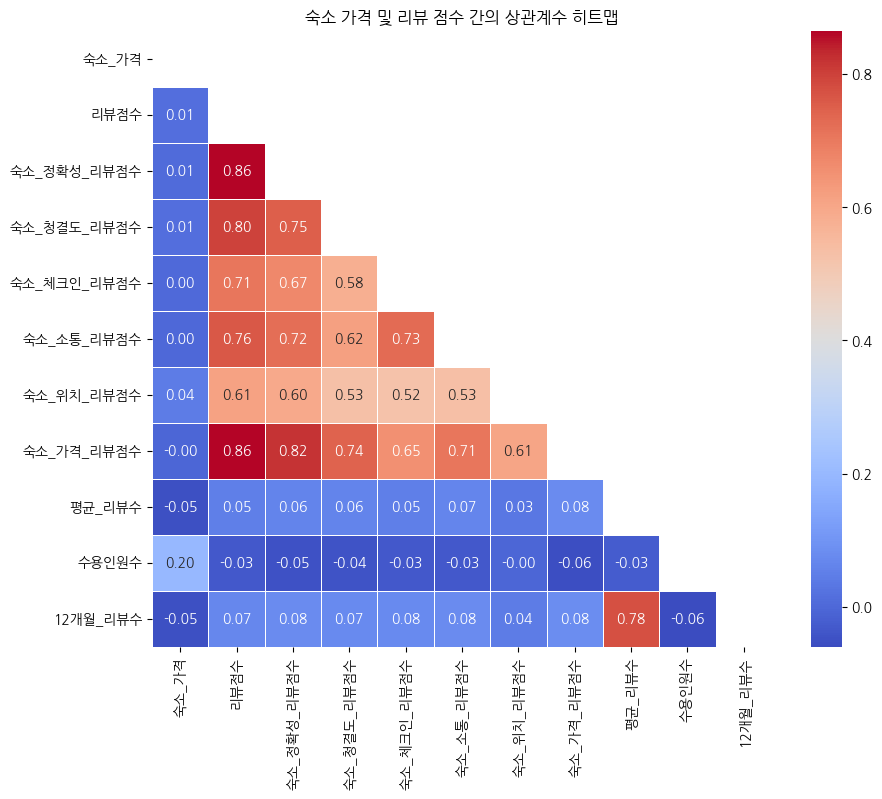

In [267]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.executable

# 데이터프레임의 상관관계 계산
corr = df_scores.corr()


# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

In [268]:
df_bed = df[['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수',
       '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수','침실수','침대수','욕실수']]


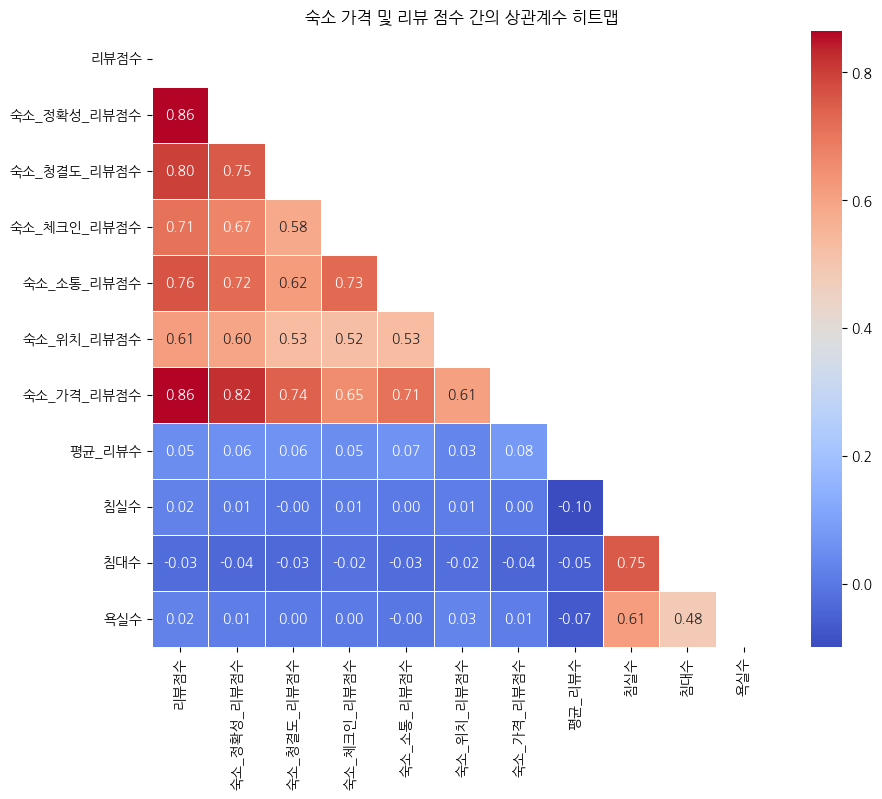

In [269]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# 데이터프레임의 상관관계 계산
corr = df_bed.corr()

# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

In [270]:
df['숙소_유형'].value_counts()

숙소_유형
Entire home/apt    28760
Private room       14360
Name: count, dtype: int64

In [271]:
df.loc[:,'숙소_유형'] = df['숙소_유형'].replace({'Entire home/apt': 1, 'Private room': 2})

C:\Users\Master\AppData\Local\Temp\ipykernel_11324\2732007862.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:,'숙소_유형'] = df['숙소_유형'].replace({'Entire home/apt': 1, 'Private room': 2})


In [272]:
df['숙소_유형'].value_counts()

숙소_유형
1    28760
2    14360
Name: count, dtype: int64

In [273]:
df['숙소_유형'] = df.loc[:,'숙소_유형'].astype(int)


In [274]:
import pandas as pd

# 지역 목록
areas = [
    'Westminster', 'Kensington and Chelsea', 'Tower Hamlets', 'Camden', 'Hackney', 
    'Southwark', 'Lambeth', 'Wandsworth', 'Islington', 'Hammersmith and Fulham', 
    'Brent', 'Ealing', 'Newham', 'Lewisham', 'Barnet', 'Haringey', 'Greenwich', 
    'Waltham Forest', 'Croydon', 'Merton', 'Richmond upon Thames', 'Hounslow', 
    'Hillingdon', 'Enfield', 'Bromley', 'Redbridge', 'Kingston upon Thames', 
    'Barking and Dagenham', 'Harrow', 'City of London', 'Bexley', 'Havering', 'Sutton'
]

# 숫자로 매핑된 딕셔너리
area_mapping = {area: i+1 for i, area in enumerate(areas)}


# replace 메서드를 사용하여 값 변환
df['숙소_지역'] = df['숙소_지역'].replace(area_mapping)

df['숙소_지역']

C:\Users\Master\AppData\Local\Temp\ipykernel_11324\3734830766.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['숙소_지역'] = df['숙소_지역'].replace(area_mapping)


0         5
1         9
2         2
3         7
4         2
         ..
90451     7
90568     9
90590     4
90648    14
90735     5
Name: 숙소_지역, Length: 43120, dtype: int64

In [275]:
df_area_type = df[['숙소_지역','숙소_유형','숙소_가격','수용인원수']]

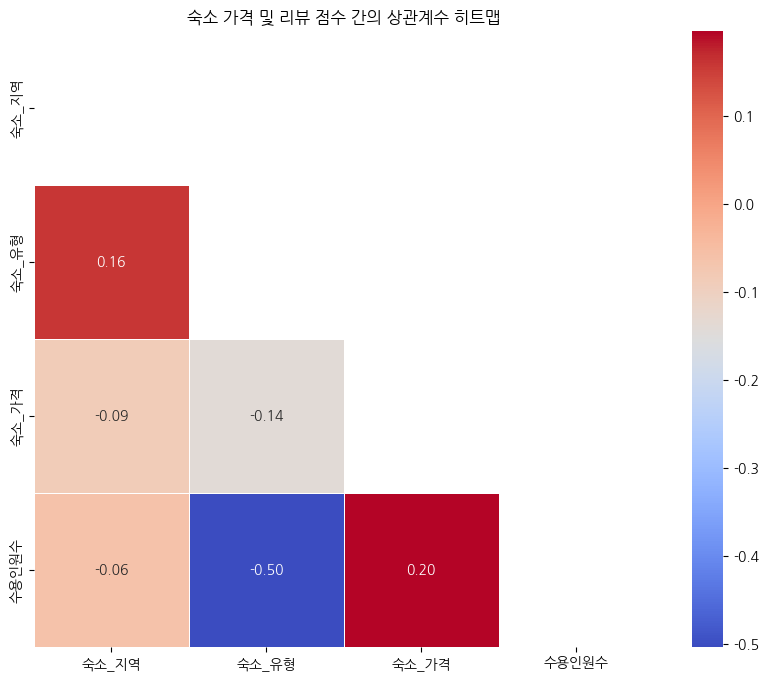

In [276]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# 데이터프레임의 상관관계 계산
corr = df_area_type.corr()

# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()

In [277]:
temp.loc[:,'숙소_유형'] = temp['숙소_유형'].replace({'Entire home/apt': 1, 'Private room': 2})
temp['숙소_유형'] = temp.loc[:,'숙소_유형'].astype(int)

C:\Users\Master\AppData\Local\Temp\ipykernel_11324\858935255.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp.loc[:,'숙소_유형'] = temp['숙소_유형'].replace({'Entire home/apt': 1, 'Private room': 2})


In [278]:
import pandas as pd

# 지역 목록
areas = [
    'Westminster', 'Kensington and Chelsea', 'Tower Hamlets', 'Camden', 'Hackney', 
    'Southwark', 'Lambeth', 'Wandsworth', 'Islington', 'Hammersmith and Fulham', 
    'Brent', 'Ealing', 'Newham', 'Lewisham', 'Barnet', 'Haringey', 'Greenwich', 
    'Waltham Forest', 'Croydon', 'Merton', 'Richmond upon Thames', 'Hounslow', 
    'Hillingdon', 'Enfield', 'Bromley', 'Redbridge', 'Kingston upon Thames', 
    'Barking and Dagenham', 'Harrow', 'City of London', 'Bexley', 'Havering', 'Sutton'
]

# 숫자로 매핑된 딕셔너리
area_mapping = {area: i+1 for i, area in enumerate(areas)}


# replace 메서드를 사용하여 값 변환
temp['숙소_지역'] = temp['숙소_지역'].replace(area_mapping)

temp['숙소_지역']

C:\Users\Master\AppData\Local\Temp\ipykernel_11324\2372945853.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp['숙소_지역'] = temp['숙소_지역'].replace(area_mapping)


0         5
1         9
2         2
3         7
4         2
         ..
90451     7
90568     9
90590     4
90648    14
90735     5
Name: 숙소_지역, Length: 65147, dtype: int64

In [279]:
temp = temp.dropna()

In [280]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43069 entries, 0 to 90735
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        43069 non-null  int64  
 1   숙소_url       43069 non-null  object 
 2   호스트_id       43069 non-null  int64  
 3   숙소_특징        43069 non-null  object 
 4   12개월_리뷰수     43069 non-null  int64  
 5   슈퍼호스트        43069 non-null  object 
 6   숙소_수         43069 non-null  float64
 7   숙소_지역        43069 non-null  int64  
 8   위도           43069 non-null  float64
 9   경도           43069 non-null  float64
 10  숙소_유형        43069 non-null  int32  
 11  수용인원수        43069 non-null  int64  
 12  욕실수          43069 non-null  float64
 13  침실수          43069 non-null  float64
 14  침대수          43069 non-null  float64
 15  어메니티         43069 non-null  object 
 16  숙소_가격        43069 non-null  float64
 17  최소_숙박일       43069 non-null  int64  
 18  최대_숙박일       43069 non-null  int64  
 19  리뷰수      

In [281]:
temp_area_type = temp[['숙소_지역','숙소_유형','숙소_가격','수용인원수']]

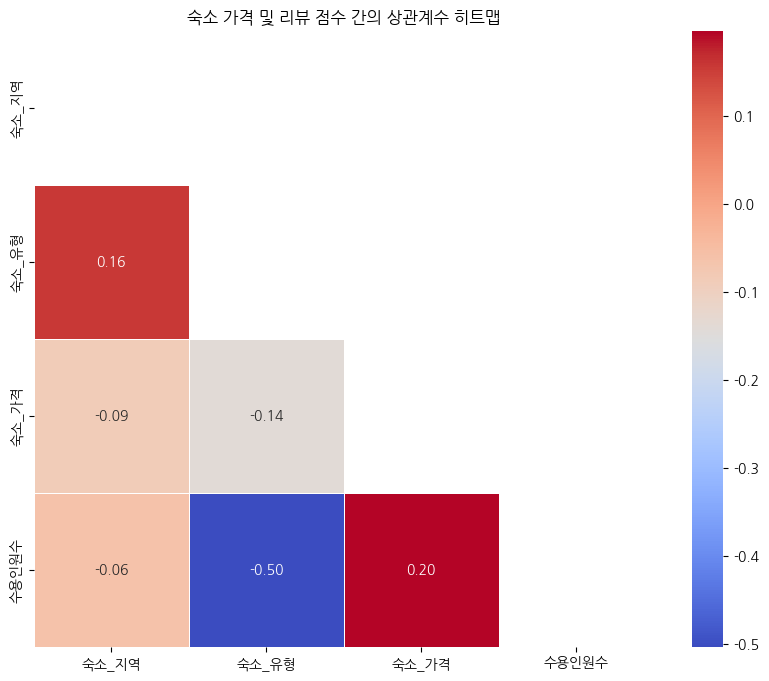

In [282]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# 데이터프레임의 상관관계 계산
corr = temp_area_type.corr()

# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그래프의 크기 설정
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('숙소 가격 및 리뷰 점수 간의 상관계수 히트맵')  # 그래프 제목 설정
plt.show()